x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)
50000 train samples
10000 test samples


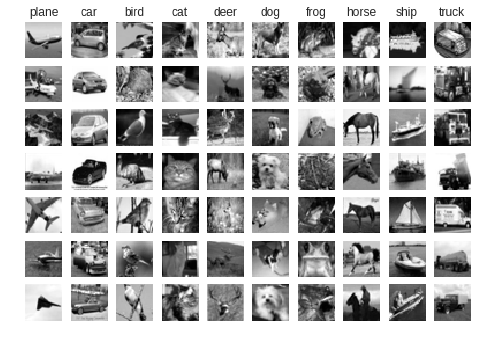

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 272s 5ms/step - loss: 1.5584 - acc: 0.4405 - val_loss: 1.1474 - val_acc: 0.5917
Epoch 2/20
50000/50000 [==============================] - 270s 5ms/step - loss: 1.1014 - acc: 0.6159 - val_loss: 0.9009 - val_acc: 0.6861
Epoch 3/20
50000/50000 [==============================] - 271s 5ms/step - loss: 0.9460 - acc: 0.6696 - val_loss: 0.8196 - val_acc: 0.7188
Epoch 4/20
50000/50000 [==============================] - 271s 5ms/step - loss: 0.8599 - acc: 0.7007 - val_loss: 0.7849 - val_acc: 0.7324
Epoch 5/20
50000/50000 [==============================] - 270s 5ms/step - loss: 0.8006 - acc: 0.7219 - val_loss: 0.7594 - val_acc: 0.7400
Epoch 6/20
50000/50000 [==============================] - 270s 5ms/step - loss: 0.7509 - acc: 0.7368 - val_loss: 0.7691 - val_acc: 0.7370
Epoch 7/20
50000/50000 [==============================] - 270s 5ms/step - loss: 0.7141 - acc: 0.7503 - val_loss: 0.7120 - 

In [41]:
 '''
Train a simple deep CNN on the CIFAR10 small images dataset.
It achieves 80% validation accuracy in 20 epochs with RGB input and normalization. (Can you get better?)
Hints: Batch Normalization, Add more Con2D layers and make sure of the input and output sizes, Different activation functions.
'''

from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os
import matplotlib.pyplot as plt
import numpy as np
import cv2
from skimage.color import rgb2gray
from skimage import io

batch_size = 32
num_classes = 10
epochs = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model_gray.h5'

# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print('x_test shape:', x_test.shape)
print('y_test shape:', y_test.shape)

print(x_train.shape[0], 'train samples')

print(x_test.shape[0], 'test samples')



'''
##############################################################
#           WRITE YOUR CODE HERE                             #
# Convert data to grey images instead of RGB                 #
# and put the results back into x_train and x_test           #
# The result should be of size nsamples x height x width x 1 #
##############################################################
'''

train_array=np.zeros((50000,32,32,1))
test_array= np.zeros((10000,32,32,1))
for i in range(x_train.shape[0]):
  train_array[i,:,:,0] = cv2.cvtColor(x_train[i,:,:,:],cv2.COLOR_BGR2GRAY)
x_train = train_array
  
for i in range(0,x_test.shape[0]):
     test_array[i,:,:,0] = cv2.cvtColor(x_test[i,:,:,:],cv2.COLOR_BGR2GRAY)
x_test = test_array

# Visualize some examples from the dataset.
# We show a few examples of training images from each class.
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        if x_train[idx].shape[-1] == 3:
            plt.imshow(x_train[idx].squeeze().astype('uint8')) #change cmap='gray' when using gray input
        else:
            plt.imshow(x_train[idx].squeeze().astype('uint8'),cmap='gray')

        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# initiate Adam optimizer
opt = keras.optimizers.Adam()

# Let's train the model
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

'''
#########################################################
#                 WRITE YOUR CODE HERE                  #
# Normalize image values from -0.5:0.5 instead of 0:225 #
#########################################################
'''

x_train = (x_train/255)-0.5
x_test = (x_test/255)-0.5

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test),
          shuffle=True)

# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)
